#                    Student Performance Multi Class Classification 

## Data Prep

In [28]:
import pandas as pd
import numpy as np


student_data = pd.read_csv('/content/student-mat.csv', delimiter = ';')
pd.set_option('display.max_columns',None)
print(student_data.shape)
student_data.head()

(395, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10


In [ ]:
student_data.isna().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [3]:
def classify_performance(col):
    if col < 10:
        return 0
    elif col >= 10 and col < 15:
        return 1
    else:
        return 2

In [ ]:
def binary_classify_performance(col):
    if col < 10:
        return 0
    else:
        return 1

In [29]:
student_data['Has_Succeeded'] = student_data['G3'].apply(classify_performance)
student_data.drop(['G3'],axis=1,inplace=True)
student_data.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Has_Succeeded
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,1
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,2
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,1


In [5]:
student_data['Has_Succeeded'].value_counts()

1    192
0    130
2     73
Name: Has_Succeeded, dtype: int64

In [30]:
one_hot_encoding = pd.get_dummies(data=student_data, columns=['school', 'sex','address','famsize','Pstatus','Mjob','Fjob','reason','guardian','schoolsup','famsup','paid','activities','nursery','higher','internet','romantic'])
one_hot_encoding.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,Has_Succeeded,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,1,3,6,5,6,0,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,1,3,4,5,5,0,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,3,4,3,2,2,3,3,10,7,8,1,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,1,5,2,15,14,2,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,2,5,4,6,10,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0


In [31]:
X = one_hot_encoding.drop(['Has_Succeeded'], axis=1)
y = one_hot_encoding['Has_Succeeded']

## Train-Test Split

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## First Classifier: Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

model_one = LogisticRegression(solver='lbfgs', max_iter=10000, multi_class='multinomial')

In [ ]:
model_one.fit(X_train,y_train)

LogisticRegression(max_iter=10000, multi_class='multinomial')

In [ ]:
model_one.score(X_test, y_test)

0.8734177215189873

In [61]:
def is_correct(row):
    if row['True Performance'] == row['Predicted Performance']:
        return 'Yes'
    else:
        return 'No'

In [ ]:
y_pred = model_one.predict(X_test)

comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
78,1,0,No
371,1,1,Yes
248,0,0,Yes
55,1,1,Yes
390,0,0,Yes
...,...,...,...
364,1,1,Yes
82,0,0,Yes
114,0,1,No
3,2,1,No


In [ ]:
comparison['Correct Prediction'].value_counts()

Yes    69
No     10
Name: Correct Prediction, dtype: int64

## Second Classifier: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model_two = RandomForestClassifier(n_estimators = 1000, criterion='entropy', random_state=42)

In [ ]:
model_two.fit(X_train,y_train)
model_two.score(X_test,y_test)

0.8607594936708861

In [ ]:
y_pred = model_two.predict(X_test)

comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
78,1,0,No
371,1,1,Yes
248,0,0,Yes
55,1,1,Yes
390,0,0,Yes
...,...,...,...
364,1,1,Yes
82,0,0,Yes
114,0,0,Yes
3,2,1,No


In [ ]:
comparison['Correct Prediction'].value_counts()

Yes    68
No     11
Name: Correct Prediction, dtype: int64

<BarContainer object of 10 artists>

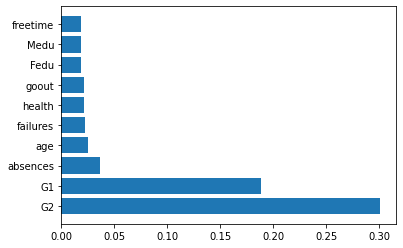

In [ ]:
from matplotlib import pyplot as plt

importance = pd.DataFrame()
importance['Feature'] = X_train.columns
importance['Importance'] = model_two.feature_importances_
importance = importance.sort_values(by = ['Importance'], ascending = False)
importance = importance.head(10)
plt.barh(importance['Feature'], importance['Importance'])

## Third Classifier: Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

model_three = DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=42)

In [ ]:
model_three.fit(X_train,y_train)
model_three.score(X_test,y_test)

0.8734177215189873

In [ ]:
y_pred = model_two.predict(X_test)

comparison = pd.DataFrame()
comparison['True Performance'] = y_test
comparison['Predicted Performance'] = y_pred
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
78,1,0,No
371,1,1,Yes
248,0,0,Yes
55,1,1,Yes
390,0,0,Yes
...,...,...,...
364,1,1,Yes
82,0,0,Yes
114,0,0,Yes
3,2,1,No


In [ ]:
comparison['Correct Prediction'].value_counts()

Yes    68
No     11
Name: Correct Prediction, dtype: int64

## Save Best Model: 

### Based on top 10 most affecting features

In [ ]:
import pickle 

file_name = 'model.sav'
pickle.dump(model_one, open(file_name, 'wb'))

In [ ]:
X = one_hot_encoding[['Medu', 'Fedu', 'health', 'absences', 'age', 'freetime', 'goout', 'G1', 'G2', 'failures']]
y = one_hot_encoding['Has_Succeeded']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model_one.fit(X_train,y_train)
model_one.score(X_test,y_test)

0.8607594936708861

In [ ]:
file_name = 'model_one.sav'
pickle.dump(model_one, open(file_name, 'wb'))

## Additional Classifier

### ANN Deep Learning Model

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# ANN Model

model = Sequential()
model.add(Dense(26, input_dim=58, activation="relu"))
model.add(Dense(13, activation="relu"))
model.add(Dense(3, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [98]:
#Re-split Data but with categorical labels
from keras.utils import to_categorical

X_train, X_test, y_train, y_test = train_test_split(X, to_categorical(y), test_size=0.2, random_state=42)
X_train.shape

(316, 58)

In [99]:
#Callbacks list to save best weights
from tensorflow.keras.callbacks import ModelCheckpoint

filepath="weights_best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [150]:
#Training phase
%%time

training_history = model.fit(X_train, y_train, epochs=10, batch_size=5, validation_data=(X_test, y_test), callbacks=callbacks_list)

Epoch 1/10
51/64 [======================>.......] - ETA: 0s - loss: 0.2578 - accuracy: 0.8863
Epoch 1: val_accuracy did not improve from 0.88608
64/64 [==============================] - 0s 3ms/step - loss: 0.2612 - accuracy: 0.8861 - val_loss: 0.3507 - val_accuracy: 0.8608
Epoch 2/10
50/64 [======================>.......] - ETA: 0s - loss: 0.2602 - accuracy: 0.9080
Epoch 2: val_accuracy did not improve from 0.88608
64/64 [==============================] - 0s 3ms/step - loss: 0.2606 - accuracy: 0.9114 - val_loss: 0.3662 - val_accuracy: 0.8228
Epoch 3/10
46/64 [====================>.........] - ETA: 0s - loss: 0.2738 - accuracy: 0.8696
Epoch 3: val_accuracy did not improve from 0.88608
64/64 [==============================] - 0s 3ms/step - loss: 0.2589 - accuracy: 0.8766 - val_loss: 0.3461 - val_accuracy: 0.8354
Epoch 4/10
51/64 [======================>.......] - ETA: 0s - loss: 0.2288 - accuracy: 0.9098
Epoch 4: val_accuracy did not improve from 0.88608
64/64 [==========================

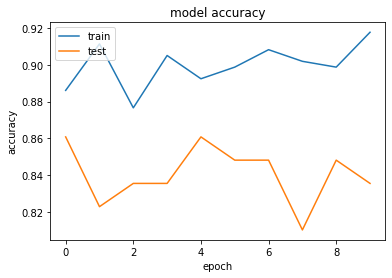

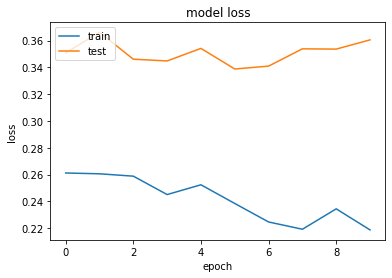

In [151]:
import matplotlib.pyplot as plt

# summarize history for training and validation accuracy
plt.plot(training_history.history['accuracy'])
plt.plot(training_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for training and validation loss
plt.plot(training_history.history['loss'])
plt.plot(training_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [152]:
#Evaluate based on best weights
model.load_weights("weights_best.hdf5")
results = model.evaluate(X_test, y_test, batch_size=5, verbose=0)
print("test loss, test acc: ", results)

test loss, test acc:  [0.3658194839954376, 0.8860759735107422]


In [153]:
#Predict using best model as probaility model
#Using probability model is easier to interpret
import tensorflow as tf

probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
                                         
y_pred = probability_model.predict(X_test)

3/3 [==============================] - 0s 4ms/step


In [154]:
l_one = []
l_two = []

for x in range(79):
  l_one.append(np.argmax(y_pred[x]))

for x in range(79):
  l_two.append(np.argmax(y_test[x]))

In [155]:
comparison = pd.DataFrame()
comparison['True Performance'] = pd.DataFrame(l_one) 
comparison['Predicted Performance'] = pd.DataFrame(l_two)
comparison['Correct Prediction'] = comparison.apply(lambda row: is_correct(row), axis=1)
comparison

,True Performance,Predicted Performance,Correct Prediction
0,0,1,No
1,1,1,Yes
2,0,0,Yes
3,1,1,Yes
4,0,0,Yes
...,...,...,...
74,1,1,Yes
75,0,0,Yes
76,1,0,No
77,2,2,Yes


In [156]:
comparison['Correct Prediction'].value_counts()

Yes    70
No      9
Name: Correct Prediction, dtype: int64

In [157]:
#Save last touch model into a JSON file
from tensorflow.keras.models import model_from_json

# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


Deep learning model was the best model with high accuracy. Yet, unfortunately it can't be used in the WebApp because, when data is reduced, the model will overfit. Hence, the results will not be as precise as logistic regression!